# Приоритизация гипотез для увеличения выручки,  A/B-тест и анализ результатов

# Цели и описание проекта

Проект состоит из двух частей, в первой части нам дано 9 гипотез для увеличение выручки, нам необходимо приоритизировать их с помощью параметров ICE и RICE и пояснить различия в методе приоритизации, во второй части дано два файла с информацией о заказах и с количеством пользователей, необходимо провести A/B-тест и принять решение по результатам теста и объясните его.

# Описание данных
***Данные для первой части*** 

**Файл /datasets/hypothesis.csv.** 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

***Данные для второй части*** 

**Файл /datasets/orders.csv**
- actionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv.** 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# План работ
***Часть 1. Приоритизация гипотез.***
- Загрузка данных
- Применение фреймворка ICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.
- Применение фреймворк RICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.
- Анализ, как изменилась приоритизация гипотез при применении RICE вместо ICE. Вывод, почему так произошло.

***Часть 2. Анализ A/B-теста***
- Загрузка данных и импорт необходимых библиотек
- Построение графика кумулятивной выручки по группам. Выводы и предположения.
- Построение графика кумулятивного среднего чека по группам. Выводы и предположения.
- Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
- Построение графика кумулятивного среднего количества заказов по группам. Выводы и предположения.
- Построение графика относительного изменения кумулятивного среднего количества заказов группы B к группе A. Выводы и предположения.
- Построение точечного графика количества заказов по пользователям. Выводы и предположения.
- Подсчёт 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.
- Построение точечного графика стоимостей заказов. Выводы и предположения.
- Подсчёт 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.
- Подсчёт статистической значимости различий в среднем количестве заказов между группами по «сырым» данным. Выводы и предположения.
- Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
- Подсчёт статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным. Выводы и предположения.
- Подсчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
- Решение по результатам теста

***Общий вывод***

## Приотизация гипотез

### Загрузка необходимых библиотек и данных

In [2]:
# загрузка библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [3]:
# расирение вывода ячеек
pd.options.display.max_colwidth = 130

# загрузка файла с гипотезами
data = pd.read_csv('/datasets/hypothesis.csv')
data.columns = data.columns.str.lower()
display(data)


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применение фреймворка ICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.

In [4]:
data['ICE'] = round((data['impact'] * data['confidence']) / data['efforts'], 2)

display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно фреймворку ICE для приоритизации гипотез наиболее приоритетно для начала запустить акцию дающий скидку на товар, затем добавить 2 новых канала привлечения трафика, добавить форму подписки на все основные страницы, сделать банеры с актуальной информацией, затем сделать блок рекомендаций товаров на сайте

### Применение фреймворк RICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Согласно фреймворку RICE для приоритизации гипотез наиболее приоритетно для начала добавить форму подписки на основные страницы, затем добавить блок рекомендаций, добавить новые каналы привлечения и показатель на главной странице банер с актуальной информацией

### Анализ, как изменилась приоритизация гипотез при применении RICE вместо ICE. Вывод, почему так произошло.

Поскольку метод приотизации гипотез RICE в отличии от ICE учитывает охват пользователей(**reach**), кардинально изменились приоритеты например **гипотеза гласящая о необходимости добавить форму подписки на основные страницы** выбилась в лидеры так обладает параметром **reach** равном 10 и опережает **гипотезу о необходимости запустить акцию, дающую скидку на товар** которая является самой приоритетной при анализе методом ICE, но не попала в приоритет обладает параметром **reach** равному 1  

## Анализ A/B-теста

### Загрузка и обработка данных

In [6]:
# загрузка файла
orders = pd.read_csv('/datasets/orders.csv')

# приведение даты к нормальному виду
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# загрузка файла
visitors = pd.read_csv('/datasets/visitors.csv')

# приведение даты к нормальному виду
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
# предпросмотр информации из таблиц
display(orders.head())
print(orders.info())
display(visitors.head())
print(visitors.info())
# подсчёт дубликатов
print(len(orders)- len(orders.drop_duplicates ()))
print(len(visitors)- len(visitors.drop_duplicates ()))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
0
0


### Построение графика кумулятивной выручки по группам. Выводы и предположения.

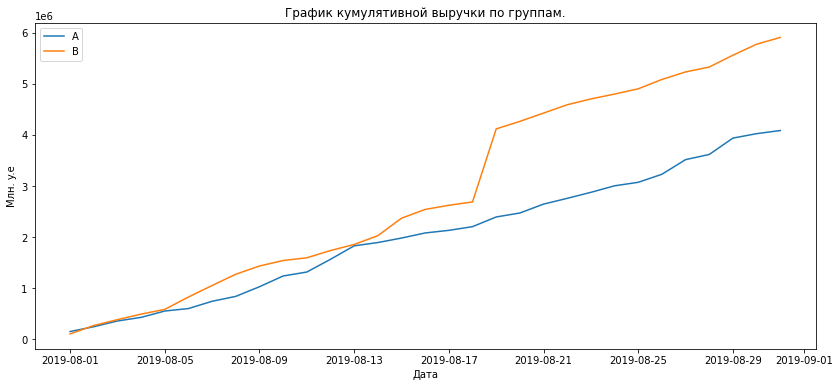

In [13]:
ordersAggregated = orders.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = visitors.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData.query('group == "A"')[['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData.query('group == "B"')[['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(14,6))
plt.xlabel("Дата")
plt.ylabel("Млн. y.e")
plt.title("График кумулятивной выручки по группам.")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

Во 2/3 от времени теста группа B вырвалась вперед и на середине резко пошла в отрыв, есть предположения что заказы с аномально 
большой суммой или же увеличение их количества влияют на результат

### Построение графика кумулятивного среднего чека по группам. Выводы и предположения.

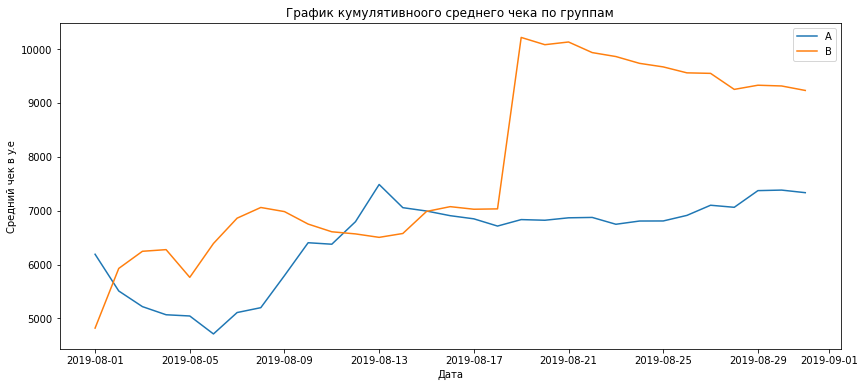

In [14]:
# Строим график
plt.figure(figsize=(14,6))
plt.xlabel("Дата")
plt.ylabel("Средний чек в y.e")
plt.title("График кумулятивноого среднего чека по группам")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

График не стабилен, группа B в середине теста резко вырвалась вперед, думаю принимать какое либо решение рано,
до анализа выбросов

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.

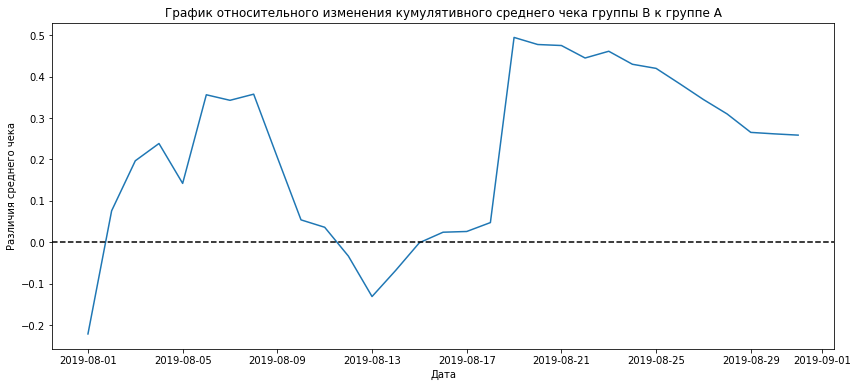

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(14,6))
plt.xlabel("Дата")
plt.ylabel("Различия среднего чека")
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Результаты теста резко меняются в определенные даты возможно в это время регистрируются аномальные заказы

### Построение графика кумулятивного среднего количества заказов по группам. Выводы и предположения.

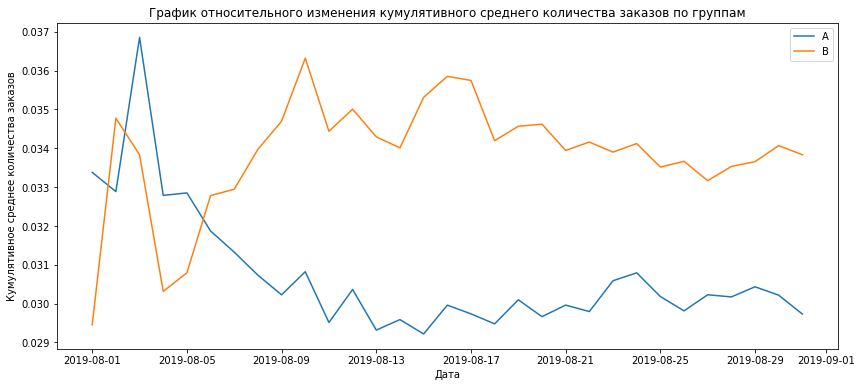

In [16]:
plt.figure(figsize=(14,6))
plt.xlabel("Дата")
plt.ylabel("Кумулятивное среднее количества заказов")
plt.title("График относительного изменения кумулятивного среднего количества заказов по группам")
plt.plot(cumulativeRevenueA['date'], cumulativeData.query('group =="A"')['orders']/cumulativeData.query('group =="A"')['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeData.query('group =="B"')['orders']/cumulativeData.query('group =="B"')['visitors'], label='B')
plt.legend() 

Графики поначалу графики не стабильны, группа B плавно перегоняет группа А на протяжение теста, думаю зависимость  аномальных выбросов по количеству заказов есть особенно она видна в начале

### Построение графика относительного изменения кумулятивного среднего количества заказов группы B к группе A. Выводы и предположения.

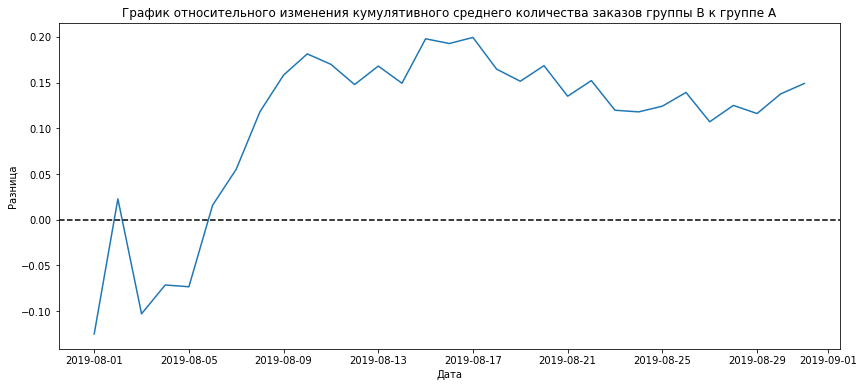

In [17]:
# cтроим отношение средних чеков
plt.figure(figsize=(14,6))
plt.xlabel("Дата")
plt.ylabel("Разница")
plt.title("График относительного изменения кумулятивного среднего количества заказов группы B к группе A")
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['ordersA']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Как видно из графика, в начале есть определенные значимые колебания графика различия, в данном случае все же имело место быть зависимость от аномально большого количества заказов

### Построение точечного графика количества заказов по пользователям. Выводы и предположения.

      transactionId  orders
1023     4256040402      11
591      2458001652      11
569      2378935119       9
487      2038680547       8
44        199603092       5


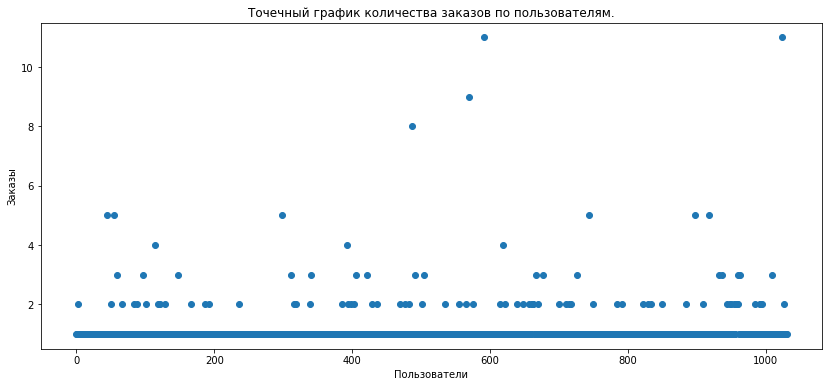

In [12]:
# Групировка пользователей по количеству заказов
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsers.columns = ['transactionId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head())

# Построение графика
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.figure(figsize=(14,6))
plt.xlabel("Пользователи")
plt.ylabel("Заказы")
plt.title("Точечный график количества заказов по пользователям.")
plt.scatter(x_values, ordersByUsers['orders']) 

Как видно из точечного графика большая часть пользователей делали от 1 до 3 заказов, остальных можно отнести к аномальным заказам

### Подсчёт 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [13]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


In [14]:
print(ordersByUsers.query('orders > 3').count())

transactionId    13
orders           13
dtype: int64


Подсчёт 95-й и 99-й перцентили подтвердил что 4 и более заказов было всего 13 штук и что это анамалии которые необходимо удалить

### Построение точечного графика стоимостей заказов. Выводы и предположения.

      transactionId     cost
168       590470918  1294500
1107     3936777065   202740
49        192721366    93940
188       666610489    92550
1029     3668308183    86620


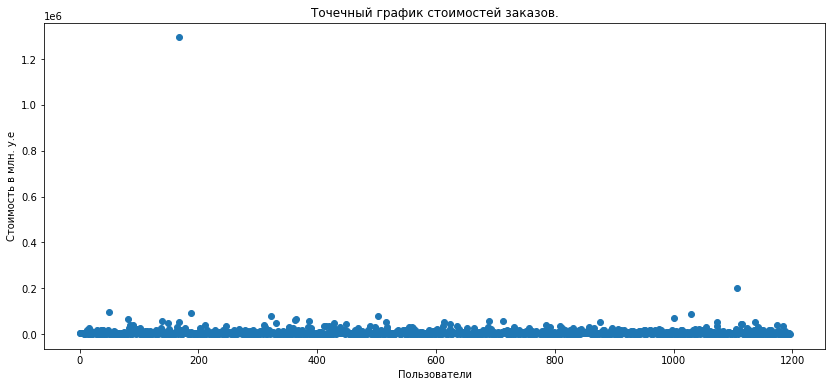

In [18]:
costByOrders = orders.groupby('transactionId', as_index=False).agg({'revenue':'sum'})
costByOrders.columns = ['transactionId', 'cost']
print(costByOrders.sort_values(by='cost', ascending=False).head())

x_values = pd.Series(range(0, len(costByOrders['cost'])))
plt.figure(figsize=(14,6))
plt.xlabel("Пользователи")
plt.ylabel("Стоимость в млн. у.е")
plt.title("Точечный график стоимостей заказов.")
plt.scatter(x_values, costByOrders['cost']) 

(-59.800000000000004, 1255.8, 0.0, 100000.0)

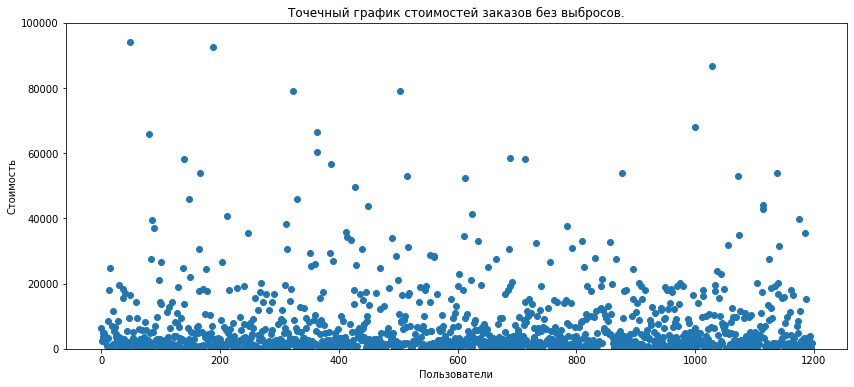

In [19]:
plt.figure(figsize=(14,6))
plt.xlabel("Пользователи")
plt.ylabel("Стоимость")
plt.title("Точечный график стоимостей заказов без выбросов.")
plt.scatter(x_values, costByOrders['cost']) 
plt.axis(ymin=0, ymax=100000)

всего 2 заказа превысило отметку в 100000 это явные анамалии

### Подсчёт 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.

In [17]:
print(np.percentile(costByOrders['cost'], [95, 99]))

[28000.  58233.2]


In [18]:
print(costByOrders.query('cost > 60000').count())

transactionId    11
cost             11
dtype: int64


Думаю отметку аномальности стоит оставить заказам более чем 60000, учитывая их количество мы немного потеряем 

### Подсчёт статистической значимости различий в среднем количестве заказов между группами по «сырым» данным. Выводы и предположения.

Так как нулевая гипотеза обычно предпалагает равенство двух совокупностей, а альтернативная ей противоположное то:

- Нулевая гипотеза - Статистических различий в среднем количестве заказов по «сырым» данным между группами нет
- Альтернативная гипотеза - Статистических различия в среднем количестве заказов по «сырым» данным между группами присутствуют

In [19]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
alpha = 0.05
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-значение: ', "{0:.5f}".format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу статистические различия в среднем количестве заказов между группами по «сырым» данным присутствуют')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистических различий в среднем количестве заказов между группами по «сырым» данным нет') 
print('''Относительное различие в среднем количестве заказов между группами по «сырым» данным составляет''', "{0:.2%}".format(sampleB.mean() / sampleA.mean() - 1))


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Отвергаем нулевую гипотезу так как p-value < 0.05, анализ по сырым данным говорит что в прирост среднего количества заказов группы В к группе А по "сырым" данным
составляет 13,8%


### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

- Нулевая гипотеза - Статистических различий в среднем чеке заказа между группами по «сырым» данным нет
- Альтернативная гипотеза - Статистических различия в среднем чеке заказа между группами по «сырым» данным присутствуют

In [20]:

p_value_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-значение: ', "{0:.5f}".format(p_value_2))
if p_value_2 < alpha:
    print('Отвергаем нулевую гипотезу статистические различия в среднем чеке между группами по «сырым» данным присутствуют')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистических различий в среднем чеке между группами по «сырым» данным нет') 
print('''Относительное различие  в среднем чеке заказа между группами по «сырым» данным составляет''', '{0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-значение:  0.72929
Не получилось отвергнуть нулевую гипотезу, статистических различий в среднем чеке между группами по «сырым» данным нет
Относительное различие  в среднем чеке заказа между группами по «сырым» данным составляет 25.87%


p-value > 0.05 стистических различий нет, относительное различие группы Б по отношению к А > 25%, нужно разобрать анамалии

### Подсчёт статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным. Выводы и предположения.

- Нулевая гипотеза - Статистических различий в среднем количестве заказов по «очищённым» данным между группами нет
- Альтернативная гипотеза - Статистических различия в среднем количестве заказов по «очищённым» данным между группами присутствуют

In [21]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
p_value_3 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-значение: ', "{0:.5f}".format(p_value_3))
if p_value_3 < alpha:
    print('Отвергаем нулевую гипотезу статистические различия в среднем количестве заказов между группами по «очищенным» данным присутствуют')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистических различий в среднем количестве заказов между группами по «очищенным» данным нет')
print('''Относительное различие в среднем количестве заказов между группами по «очищенным» данным состовляет'''' {0:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


p-значение:  0.01282
Отвергаем нулевую гипотезу статистические различия в среднем количестве заказов между группами по «очищенным» данным присутствуют
Относительное различие в среднем количестве заказов между группами по «очищенным» данным состовляет 15.288%


p-value < 0.05 стистические различия в среднем количестве заказов есть, относительное различие группы Б по отношению к А > 15%

### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

In [70]:
p_value_4 = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
print('p-значение: ', "{0:.5f}".format(p_value_4))
if p_value_4 < alpha:
    print('Отвергаем нулевую гипотезу статистические различия в среднем чеке между группами по «очищенным» данным присутствуют')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистических различий в среднем чеке между группами по «очищенным» данным нет') 
print('''Относительное различие в среднем чеке заказа между группами по «очищенным» данным состовляет''',  
    "{0:.3%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-значение:  0.92077
Не получилось отвергнуть нулевую гипотезу, статистических различий в среднем чеке между группами по «очищенным» данным нет
Относительное различие в среднем чеке заказа между группами по «очищенным» данным состовляет -0.053%


После удаления аномальных данных p-value > 0.05 статистических различий нет, относительное различие группы Б по отношению к А составляет всего 0.053% при этом учитывая большое p-value, можно сделать вывод что различий по среднему чеку между группами нет

### Решение по результатам теста

По результатам теста, мы приняли решение **остановить тест зафиксировать победу группы Б** , хотя каких либо статистических отличий, так и значимых относительных по среднему чеку по "очищённым" данным между группами нет, но стистические различия в среднем количестве заказов есть, относительное различие группы Б по отношению к А > 15% по количеству заказов

# Общий вывод

- На основе проведенной работы можно сделать общий вывод.Согласно фреймворку ICE для приоритизации гипотез наиболее приоритетно для начала запустить акцию дающий скидку на товар, затем добавить 2 новых канала привлечения трафика, добавить форму подписки на все основные страницы, сделать банеры с актуальной информацией, затем сделать блок рекомендаций товаров на сайте. Согласно фреймворку RICE для приоритизации гипотез наиболее приоритетно для начала добавить форму подписки на основные страницы, затем добавить блок рекомендаций, добавить новые каналы привлечения и показатель на главной странице банер с актуальной информацией. Поскольку метод приотизации гипотез RICE в отличии от ICE учитывает охват пользователей(**reach**), кардинально изменились приоритеты например **гипотеза гласящая о необходимости добавить форму подписки на основные страницы** выбилась в лидеры так обладает параметром **reach** равном 10 и опережает **гипотезу о необходимости запустить акцию, дающую скидку на товар** которая является самой приоритетной при анализе методом ICE, но не попала в приоритет обладает параметром **reach** равному 1.
- Касательно анализа A/B теста файлы данные на тест без пропусков, единственное что было сделано по преобработке это приведение столбцов с датой к нужному типу данных. На всех представставленных графиках кумулятивного среднего чека  и количества заказов по группам лидирует группа Б, но учитывая не стабильный график, выводы делать рано необходимо вычислить анамалии, при подсчёте  
95-й и 99-й перцентиля количества и стоимости заказов было выявлено что клиенты имеющие более 3 заказов, на сумму более 60000,  являются анамальными и малозначительными поэтому при дальнейшем анализе и при расчете статистической различия их исключили, при расчете по "сырым" данным мы получили относительную разницу среднего чека в более чем 25%, при этом статистического различия обнаружено не было, что не скажешь про статистические различия в среднем количестве заказов между группами они есть как и относительная разница в более 13% что только подтверждается при очистке от анамалий, при этом относительная разница среднего чека минимизируется, статистическая разница так же не появляется. На основании этого можно сделать вывод что средний чек между группами не отличается, зато есть статистическая и относительная разница в количестве заказов, здесь лидер группа Б. Тест можно признать успешным 